#### Importing Necessary Modules

In [56]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import sys
import os
import pickle
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

#### Importing common utils functions

In [57]:
abs = os.getcwd()
abs = abs.replace("\\src\\Classification\\Fatal_Health","")
#ab = ab + ("\\dataset\\")
abs

'c:\\Users\\Amit.K\\Desktop\\AiMl\\afour-ai\\ML_Framework'

In [58]:
abs = abs   + "\\utils"
sys.path.insert(0, abs)

In [59]:
# common utils
from common import get_dataset_info
from common import get_count_and_percentage_missing_values
from common import replace_missing_values
from common import remove_outlier_IQR
from common import preprocess_numeric_column_data
from common import standardization
from common import normalization
from common import model_evaluate

# classification utils
from classification_utils import get_classification_report
from classification_utils import plot_confusion_matrix





In [60]:
abs = os.getcwd()
abs = abs.replace("\\src\\Classification\\Fatal_Health","") 
abs

'c:\\Users\\Amit.K\\Desktop\\AiMl\\afour-ai\\ML_Framework'

#### Data Analysis

In [61]:
df=pd.read_csv(abs + "/dataset/Classification/Fatal_Health/fetal_health.csv")
df.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [62]:
get_count_and_percentage_missing_values(df)

                                                    count  % null
baseline value                                          0     0.0
accelerations                                           0     0.0
fetal_movement                                          0     0.0
uterine_contractions                                    0     0.0
light_decelerations                                     0     0.0
severe_decelerations                                    0     0.0
prolongued_decelerations                                0     0.0
abnormal_short_term_variability                         0     0.0
mean_value_of_short_term_variability                    0     0.0
percentage_of_time_with_abnormal_long_term_vari...      0     0.0
mean_value_of_long_term_variability                     0     0.0
histogram_width                                         0     0.0
histogram_min                                           0     0.0
histogram_max                                           0     0.0
histogram_

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [64]:
df.fetal_health.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [65]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


<AxesSubplot: xlabel='fetal_health', ylabel='count'>

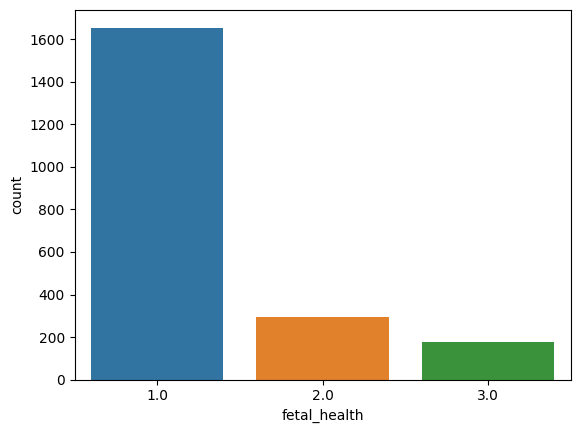

In [66]:
sns.countplot(x='fetal_health',data=df)

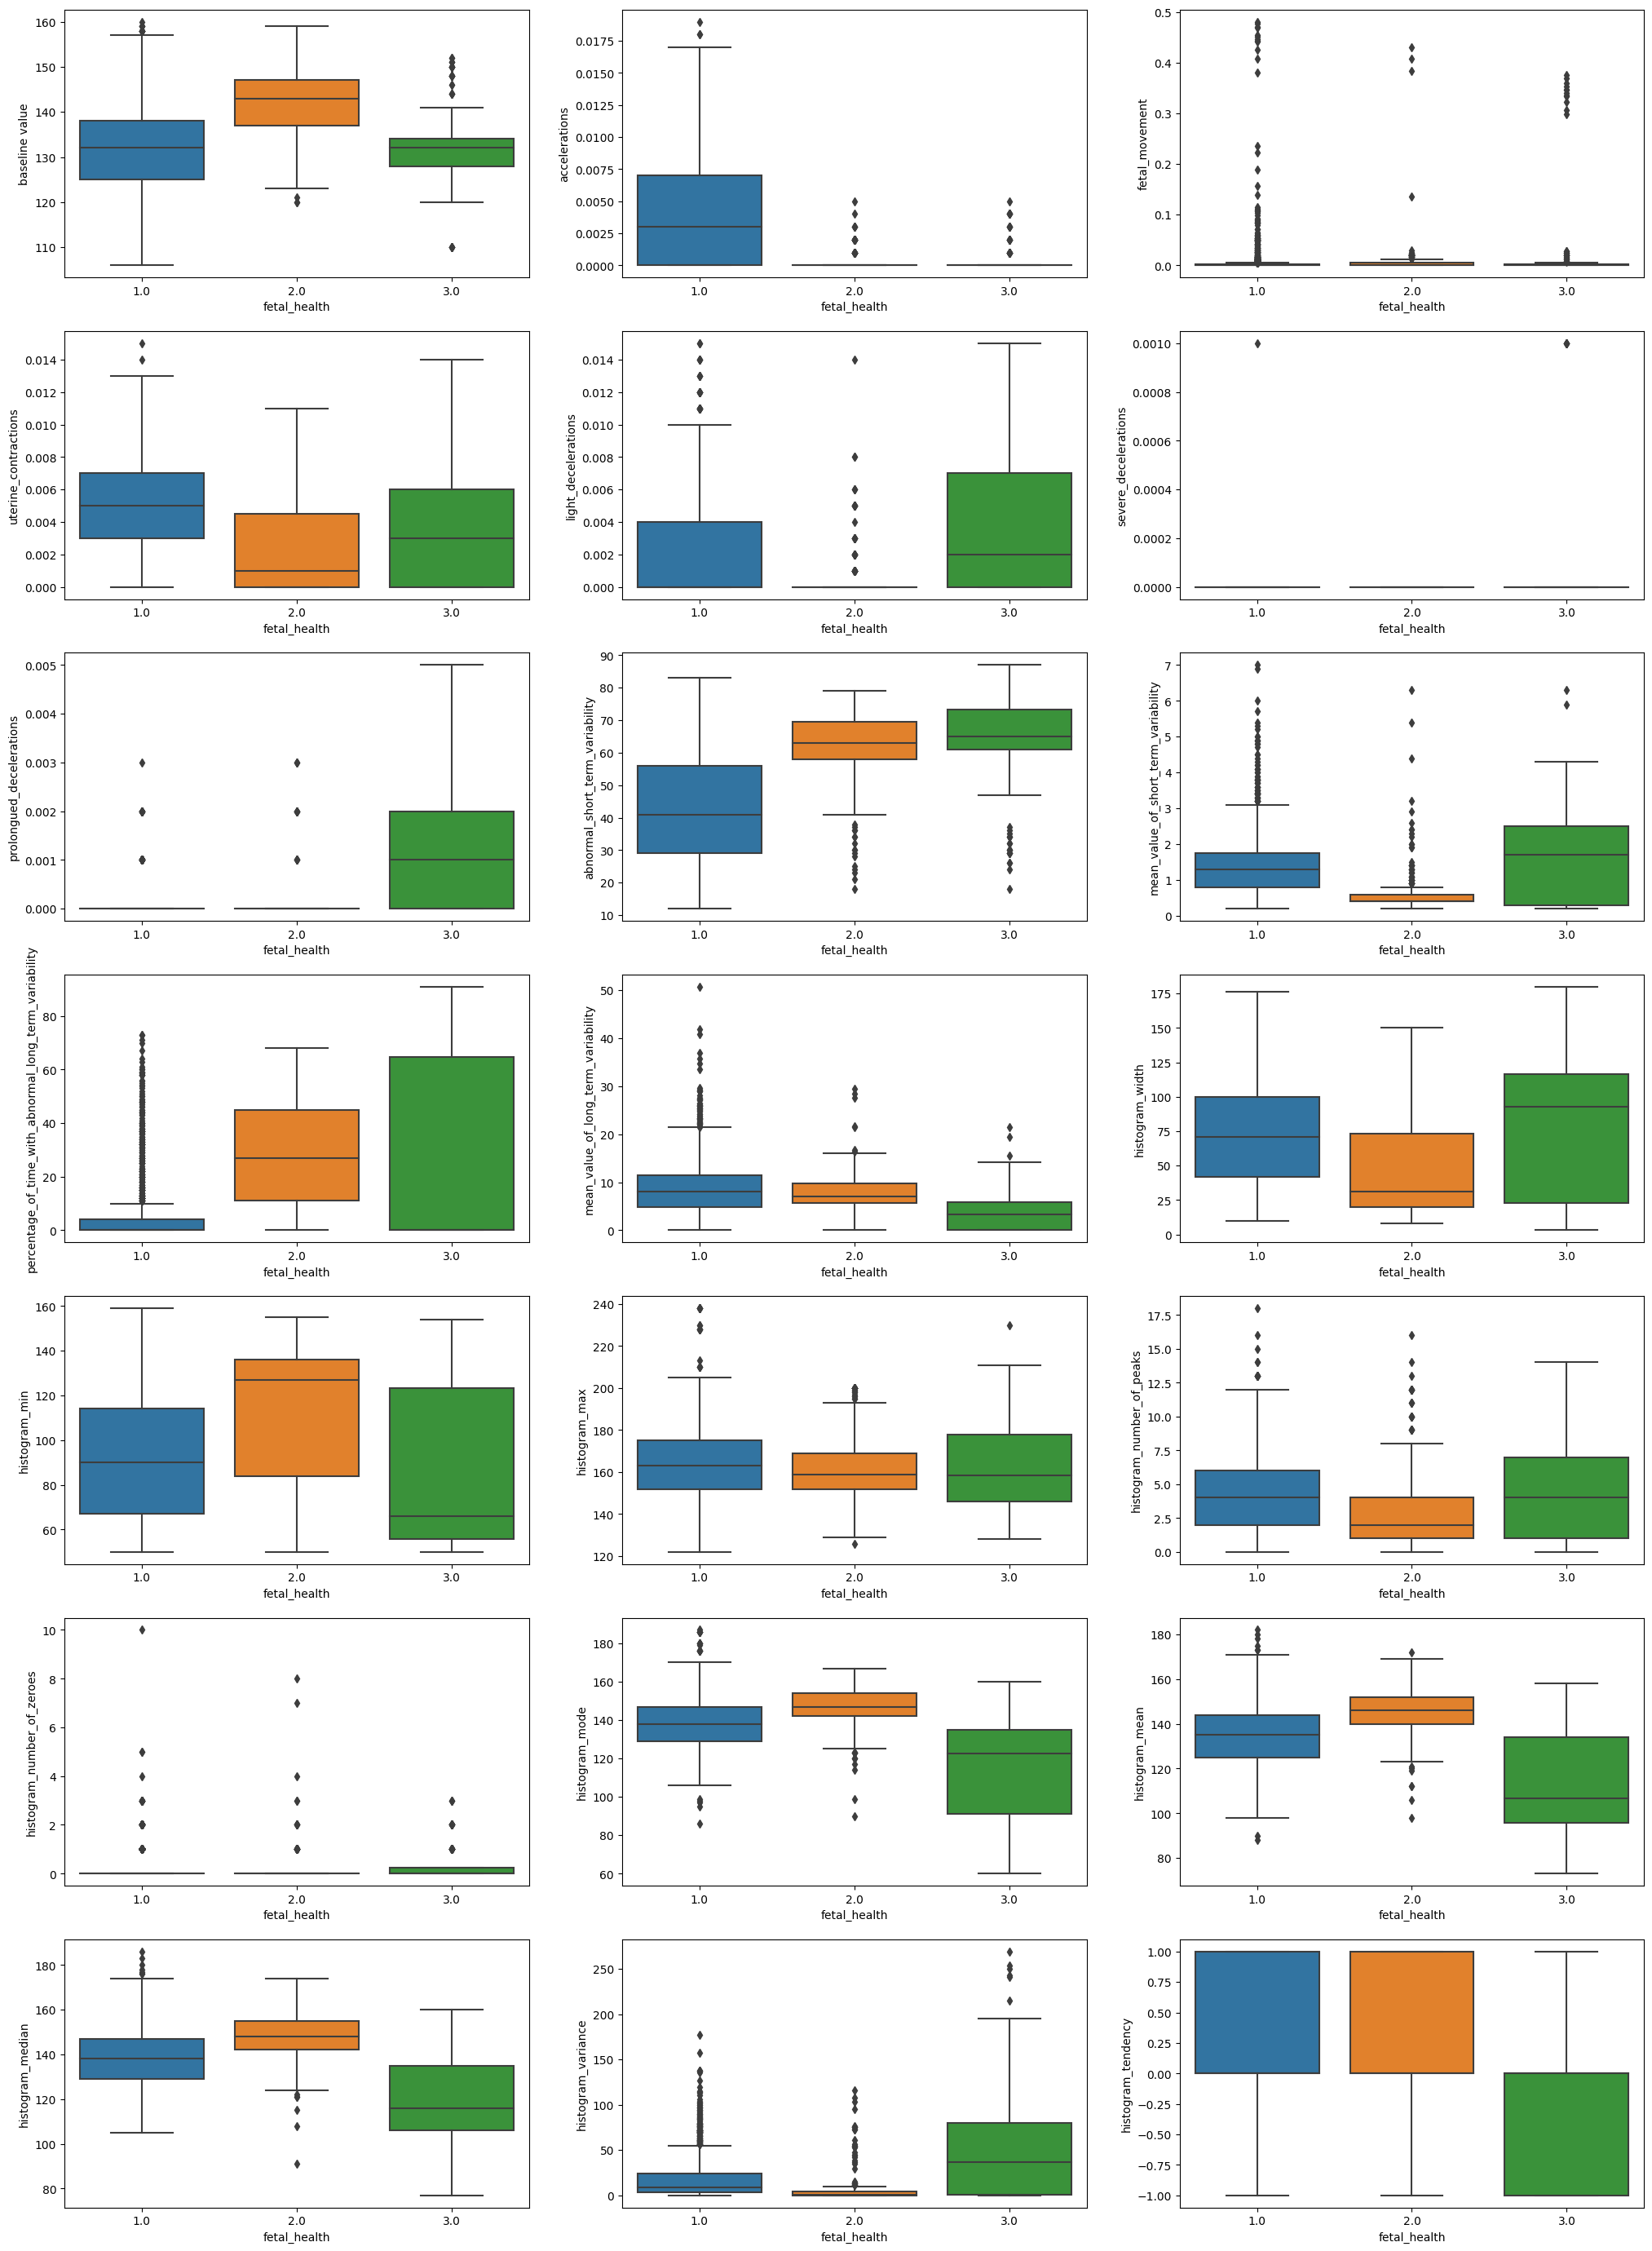

In [67]:
plt.figure(figsize=(25,35))
i=1
for feat in df.iloc[:,:-1].columns:
    plt.subplot(7,3,i)
    sns.boxplot(x='fetal_health',y=feat,data=df)
    i+=1

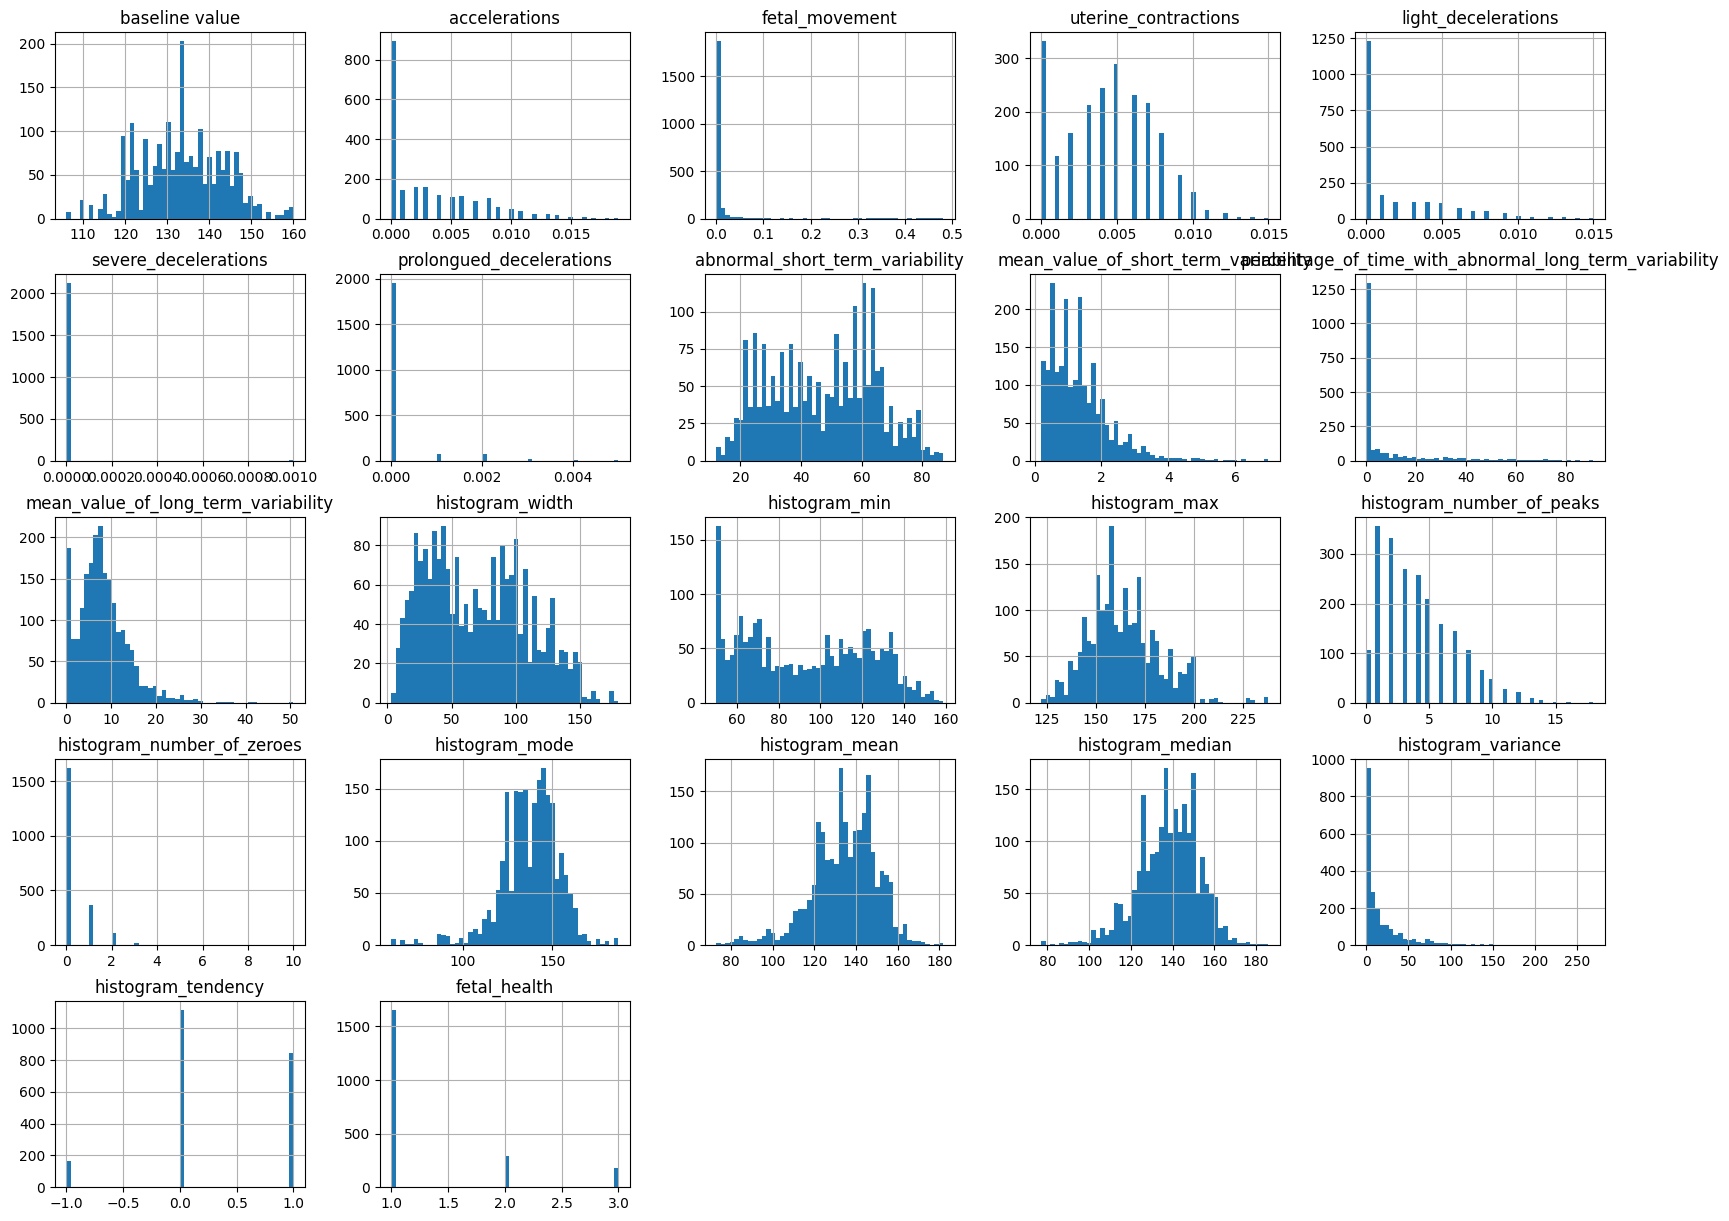

In [68]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [69]:
for col in df.columns:
    print(df[col].value_counts())

133.0    136
130.0    111
122.0    109
138.0    103
125.0     91
128.0     85
120.0     78
142.0     77
144.0     77
132.0     76
136.0     72
140.0     70
134.0     67
135.0     65
146.0     62
127.0     60
137.0     59
129.0     57
131.0     56
143.0     56
123.0     56
148.0     52
121.0     44
139.0     39
141.0     39
126.0     38
145.0     37
115.0     28
150.0     26
110.0     21
149.0     18
119.0     17
152.0     17
112.0     16
147.0     14
151.0     14
159.0     12
114.0     11
158.0     10
124.0     10
118.0      9
154.0      8
106.0      7
116.0      5
157.0      4
156.0      4
117.0      2
160.0      1
Name: baseline value, dtype: int64
0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: accelerations, dtype: int64
0.000    1311
0.001     164
0.002     112
0.003

#### Column Selection

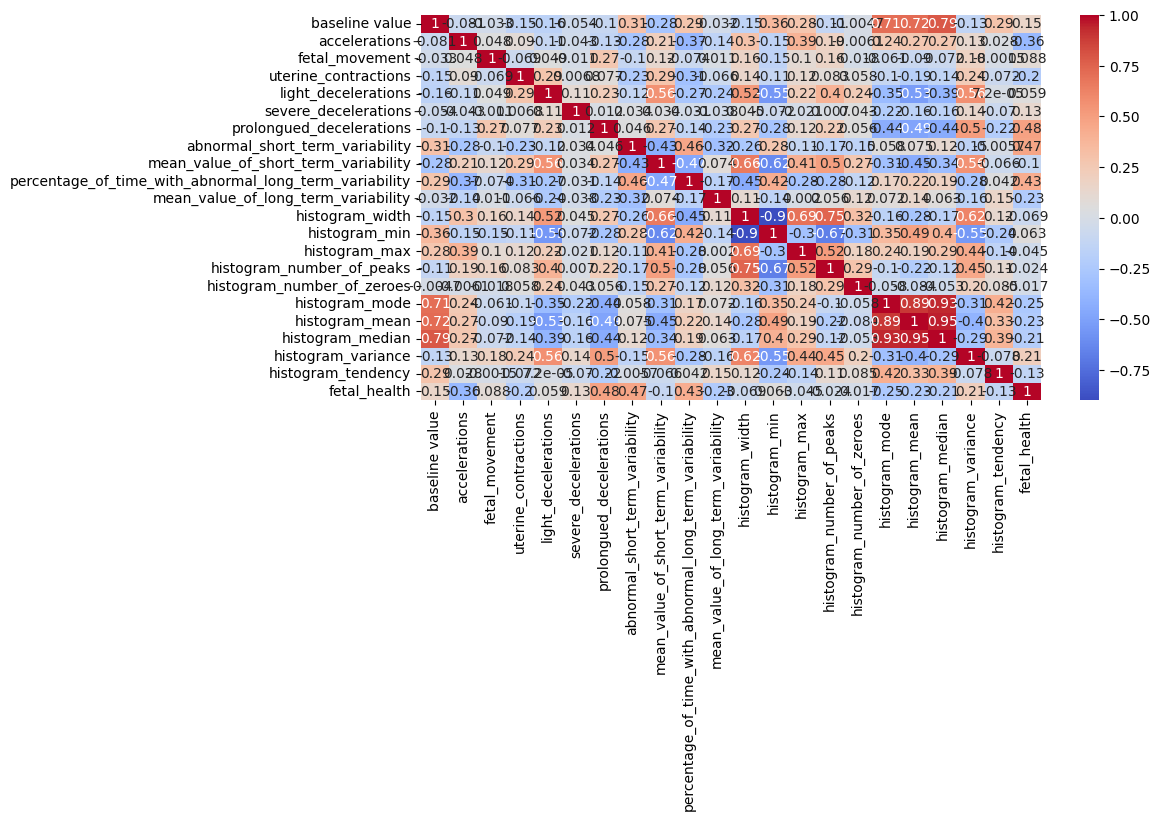

In [70]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot = True , cmap = 'coolwarm' );

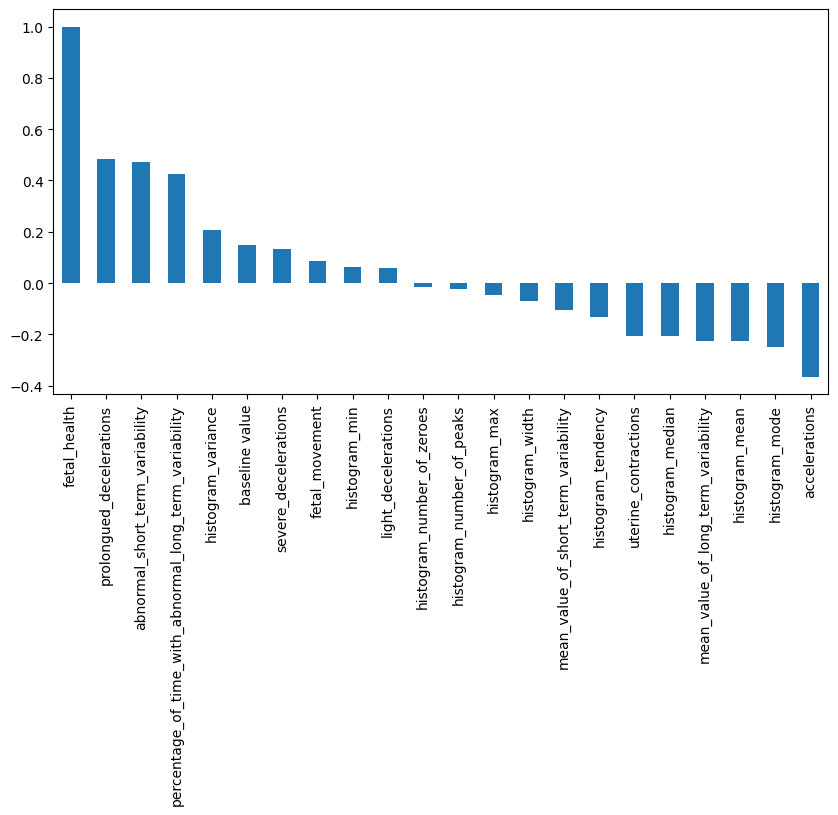

In [71]:
corr_mat = df.corr()
plt.figure(figsize = (10,5))
corr_mat['fetal_health'].sort_values(ascending = False).plot(kind = 'bar');

In [72]:
df.corr()['fetal_health'].abs().sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
accelerations                                             0.364066
histogram_mode                                            0.250412
histogram_mean                                            0.226985
mean_value_of_long_term_variability                       0.226797
histogram_variance                                        0.206630
histogram_median                                          0.205033
uterine_contractions                                      0.204894
baseline value                                            0.148151
histogram_tendency                                        0.131976
severe_decelerations                                      0.131934
mean_value_of_short_term_variability                      0.10

In [73]:
df = df.drop(columns=["histogram_number_of_zeroes","baseline value","fetal_movement","light_decelerations","severe_decelerations","mean_value_of_short_term_variability"],axis=1)
df = df.drop(["histogram_number_of_peaks"],axis=1)
df = df.drop(["histogram_max"],axis=1)
df = df.drop(["histogram_min"],axis=1)
df = df.drop(["histogram_width"],axis=1)
df = df.drop(["histogram_tendency"],axis=1)

In [74]:
df.head()

,accelerations,uterine_contractions,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_mode,histogram_mean,histogram_median,histogram_variance,fetal_health
0,0.000,0.000,0.0,73.0,43.0,2.4,120.0,137.0,121.0,73.0,2.0
1,0.006,0.006,0.0,17.0,0.0,10.4,141.0,136.0,140.0,12.0,1.0
2,0.003,0.008,0.0,16.0,0.0,13.4,141.0,135.0,138.0,13.0,1.0
3,0.003,0.008,0.0,16.0,0.0,23.0,137.0,134.0,137.0,13.0,1.0
4,0.007,0.008,0.0,16.0,0.0,19.9,137.0,136.0,138.0,11.0,1.0


In [75]:
df.shape

(2126, 11)

In [76]:
scale_list,normalize_list = preprocess_numeric_column_data(df)

In [77]:
scale_list

['uterine_contractions', 'abnormal_short_term_variability', 'histogram_median']

In [78]:
normalize_list

['accelerations',
 'prolongued_decelerations',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_mode',
 'histogram_mean',
 'histogram_variance',
 'fetal_health']

In [79]:
standardization(df,scale_list)

In [80]:
normalization(df,normalize_list)

#### Model Development

In [81]:
X = df.drop(['fetal_health'], axis=1)
y = df['fetal_health']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

##### Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression

## lr = LogisticRegression(solver="lbfgs")
lr = LogisticRegression(multi_class="multinomial",C=0.01,penalty="l2",solver='lbfgs')
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100, 2)))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       333
         1.0       0.79      0.47      0.59        64
         2.0       0.71      0.59      0.64        29

    accuracy                           0.88       426
   macro avg       0.80      0.68      0.72       426
weighted avg       0.87      0.88      0.86       426

Test Accuracy: 87.56%


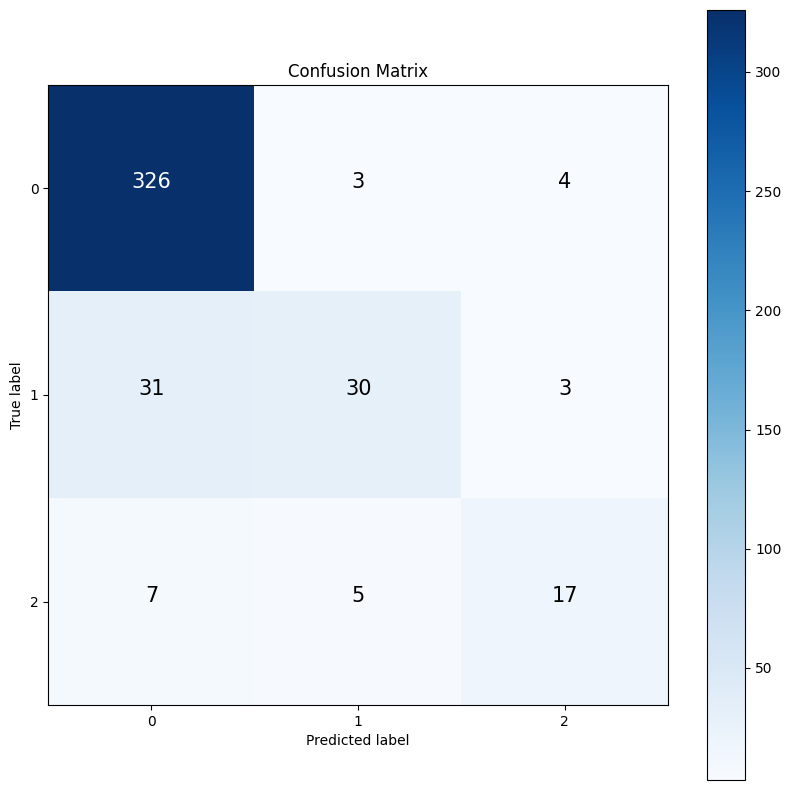

In [83]:
plot_confusion_matrix(y_test, y_pred_lr)

##### Hyper-parameter tuning

In [84]:
# Model = LogisticRegression()

In [85]:
# param_grid =[{
#     'penalty':[ 'l2', 'none'],
#     'C':np.logspace(-4,4,20),
#     'solver':['newton-cg', 'lbfgs', 'sag', 'saga'],
#     'max_iter':[100,1000,2500,5000]

# }]

In [86]:
# from sklearn.model_selection import GridSearchCV

In [87]:
# using_para_in_grds = GridSearchCV(Model,param_grid=param_grid,cv=3,verbose=True,n_jobs=-1)

In [88]:
# best_parameters = using_para_in_grds.fit(X_train,y_train)

In [89]:
# best_parameters.best_estimator_

In [90]:
lr = LogisticRegression(C=0.0001,max_iter=1000,penalty="none",)
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100, 2)))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       333
         1.0       0.63      0.61      0.62        64
         2.0       0.69      0.69      0.69        29

    accuracy                           0.87       426
   macro avg       0.75      0.75      0.75       426
weighted avg       0.87      0.87      0.87       426

Test Accuracy: 87.32%


c:\Users\Amit.K\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


##### KNeighborsClassifier

In [91]:
from sklearn.neighbors import KNeighborsClassifier

A = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)

    A.append((i, knn.score(X_test, y_test)*100)) 

print(A)

[(1, 92.48826291079813), (2, 91.07981220657277), (3, 90.84507042253522), (4, 90.61032863849765), (5, 91.07981220657277), (6, 90.84507042253522), (7, 91.07981220657277), (8, 90.3755868544601), (9, 89.90610328638498)]


#### Random_Forest Classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000,random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Random Forest Classifier report: 

               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       333
         1.0       0.89      0.78      0.83        64
         2.0       0.93      0.93      0.93        29

    accuracy                           0.95       426
   macro avg       0.93      0.90      0.91       426
weighted avg       0.95      0.95      0.95       426

Test Accuracy: 94.84%


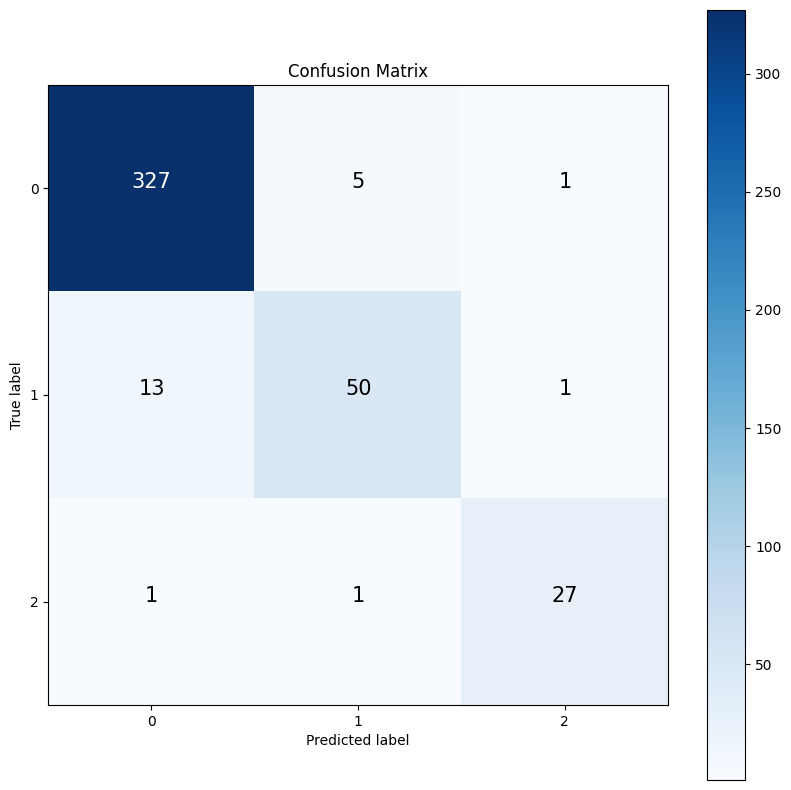

In [93]:
plot_confusion_matrix(y_test, y_pred_rf)

#### Hyper-parameter tuning

In [94]:
# Model = RandomForestClassifier()

In [95]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}


In [96]:
# using_para_in_grds = GridSearchCV(Model,param_grid=random_grid,cv=3,verbose=True,n_jobs=-1)

In [97]:
# best_parameters = using_para_in_grds.fit(X_train,y_train)

In [98]:
# best_parameters.best_estimator_

In [99]:
#pickle.dump(rf, open(abs + "\\output\\Classification\\Fatal_Health\\rf_model.pkl", 'wb'))